In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [2]:
# This should print something along the lines of '2.0.0-rc1'
tf.__version__

'2.0.0-rc1'

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Cifar100
# labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
#                 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
#                 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
#                 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
#                 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
#                 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#                 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#                 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#                 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#                 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#                 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#                 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#                 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#                 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#                 'worm']

# Cifar10
# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# MNIST
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [5]:
# Pre-process data
img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [6]:
# Create model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    return model

In [7]:
# Create and fit model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 10, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [8]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0192 - accuracy: 0.8667 - val_loss: 0.0063 - val_accuracy: 0.9578
Epoch 2/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0089 - accuracy: 0.9427 - val_loss: 0.0047 - val_accuracy: 0.9697
Epoch 3/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0073 - accuracy: 0.9524 - val_loss: 0.0043 - val_accuracy: 0.9710
Epoch 4/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0062 - accuracy: 0.9599 - val_loss: 0.0037 - val_accuracy: 0.9767
Epoch 5/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0057 - accuracy: 0.9637 - val_loss: 0.0042 - val_accuracy: 0.9732
Epoch 6/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0052 - accuracy: 0.9673 - val_loss: 0.0035 - val_accuracy: 0.9772
Epoch 7/20
60000/60000 [==============================] 

In [9]:
# Assess base model accuracy on regular images
print("Base accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Base accuracy on regular images: [0.002967956433564763, 0.9823]


In [10]:
# Function to create adversarial pattern
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

five
three


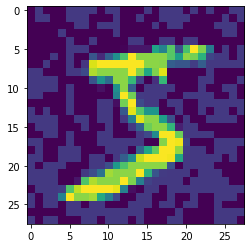

In [11]:
# Create a signle adversarial example
image = x_train[0]
image_label = y_train[0]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.1

print(labels[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()

In [12]:
# Adversarial data generator
def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

Prediction: three Truth: nine


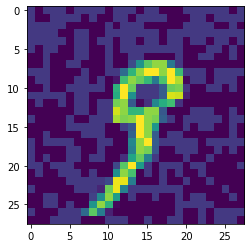

Prediction: three Truth: nine


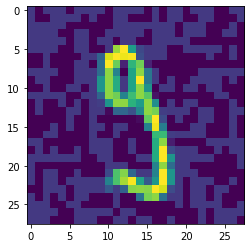

Prediction: seven Truth: three


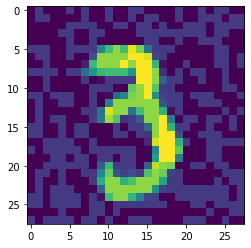

Prediction: three Truth: seven


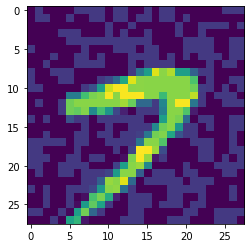

Prediction: three Truth: four


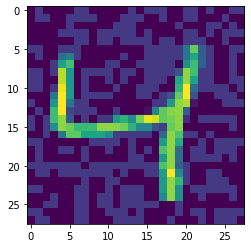

Prediction: three Truth: nine


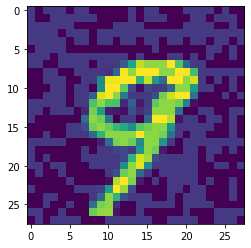

Prediction: five Truth: five


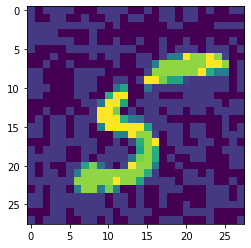

Prediction: four Truth: nine


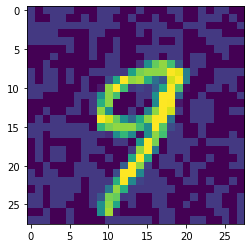

Prediction: nine Truth: four


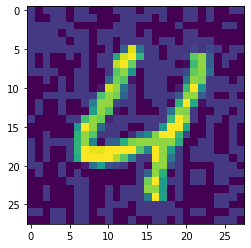

Prediction: nine Truth: zero


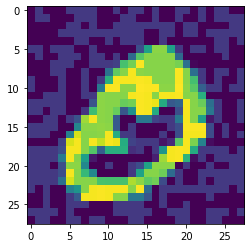

Prediction: eight Truth: zero


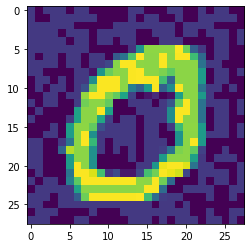

Prediction: two Truth: one


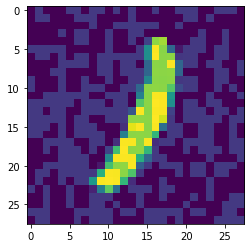

In [13]:
# Generate and visualize 12 adversarial images
adversarials, correct_labels = next(generate_adversarials(12))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], 'Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [14]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
x_adversarial_train, y_adversarial_train = next(generate_adversarials(20000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [15]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [0.13803682882785798, 0.2012]


In [16]:
# Learn from adversarial data
model.fit(x_adversarial_train, y_adversarial_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 80us/sample - loss: 0.0068 - accuracy: 0.9623 - val_loss: 0.0080 - val_accuracy: 0.9553
Epoch 2/10
20000/20000 [==============================] - 2s 87us/sample - loss: 0.0021 - accuracy: 0.9891 - val_loss: 0.0093 - val_accuracy: 0.9486
Epoch 3/10
20000/20000 [==============================] - 2s 89us/sample - loss: 0.0021 - accuracy: 0.9890 - val_loss: 0.0096 - val_accuracy: 0.9477
Epoch 4/10
20000/20000 [==============================] - 2s 90us/sample - loss: 0.0021 - accuracy: 0.9895 - val_loss: 0.0091 - val_accuracy: 0.9501
Epoch 5/10
20000/20000 [==============================] - 2s 84us/sample - loss: 0.0015 - accuracy: 0.9925 - val_loss: 0.0096 - val_accuracy: 0.9478
Epoch 6/10
20000/20000 [==============================] - 2s 82us/sample - loss: 1.9439e-04 - accuracy: 0.9990 - val_loss: 0.0123 - val_accuracy: 0.9329
Epoch 7/10
20000/20000 [============================

In [17]:
# Assess defended model on adversarial data
print("Defended accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

# Assess defended model on regular data
print("Defended accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Defended accuracy on adversarial images: [3.020054845218167e-25, 1.0]
Defended accuracy on regular images: [0.011241577985890636, 0.9384]


In [18]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))
print("Defended accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Defended accuracy on adversarial images: [0.05324754492491484, 0.7229]
